In [1]:
from CGAT import Database
database = "/ifs/projects/proj028/TREX_iCLIP_3reps/csvdb"


In [2]:
Database.fetch_DataFrame("select * FROM sqlite_master where type='table'", database)

,type,name,tbl_name,rootpage,sql
0,table,sample_table,sample_table,2,"CREATE TABLE sample_table ( barcode TEXT, form..."
1,table,hiseq5umi_stats,hiseq5umi_stats,5,CREATE TABLE hiseq5umi_stats ( _2018_03_31_16_...
2,table,misequmi_stats,misequmi_stats,109,CREATE TABLE misequmi_stats ( _2018_03_31_16_5...
3,table,hiseq8umi_stats,hiseq8umi_stats,120,CREATE TABLE hiseq8umi_stats ( _2018_03_31_16_...
4,table,hiseq7umi_stats,hiseq7umi_stats,247,CREATE TABLE hiseq7umi_stats ( _2018_03_31_16_...
5,table,hiseq6umi_stats,hiseq6umi_stats,375,CREATE TABLE hiseq6umi_stats ( _2018_03_31_16_...
6,table,geneset_all_context_interval_stats,geneset_all_context_interval_stats,479,CREATE TABLE geneset_all_context_interval_stat...
7,table,read_length_distribution,read_length_distribution,482,CREATE TABLE read_length_distribution ( count ...
8,table,deduped_bam_stats,deduped_bam_stats,595,CREATE TABLE deduped_bam_stats ( category TEXT...
9,table,reproducibility_distance,reproducibility_distance,618,CREATE TABLE reproducibility_distance ( File1 ...


In [27]:
kmers = Database.fetch_DataFrame('''SELECT * 
                                        FROM all_bases_kmers 
                                        WHERE  replicate='union' ''', database)
import pandas
kmers["Z"] = kmers["Z"].astype("float")
kmers = kmers.pivot("Kmer", "factor", "Z")
kmers = kmers[~kmers.index.str.contains("N")]
kmers.head()

factor,Alyref,Chtop,Cntrl,Nxf1
Kmer,,,,
AAAAAA,24.651209,47.625439,10.323381,21.629536
AAAAAAA,23.923551,52.365869,9.578184,17.602935
AAAAAAC,8.613412,18.057343,2.370274,6.644401
AAAAAAG,1.734181,10.262838,2.588812,2.239244
AAAAAAT,0.087715,15.071286,1.994915,7.059565


In [4]:
%matplotlib inline

In [12]:
kmers.dtypes

factor
Kmer       object
Alyref    float64
Chtop     float64
Cntrl     float64
Nxf1      float64
dtype: object

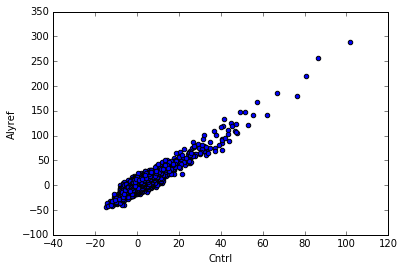

In [13]:
kmers.plot(x="Cntrl", y="Alyref", kind="scatter")

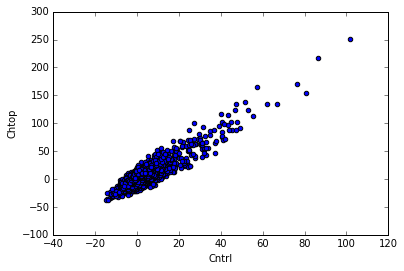

In [16]:
kmers.plot(x="Cntrl", y="Chtop", kind="scatter")

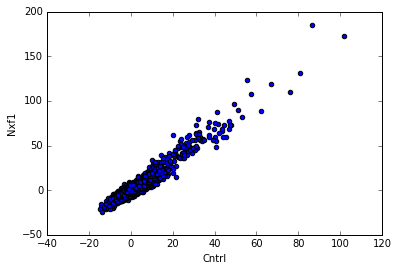

In [17]:
kmers.plot(x="Cntrl", y="Nxf1", kind="scatter")

In [19]:
kmers.sort_values("Alyref", ascending=False).head()

factor,Kmer,Alyref,Chtop,Cntrl,Nxf1
21077,TTTTTT,289.026021,250.733740,101.758011,173.159425
21081,TTTTTTT,255.853685,216.062477,86.607790,184.524078
21080,TTTTTTG,219.713575,153.882925,80.627716,131.737192
21072,TTTTTG,185.938305,134.042229,66.889851,118.954012
5224,ATTTTT,179.223004,170.313163,76.271267,109.623477


In [23]:
kmers.sort_values("Chtop", ascending=False).head()

factor,Kmer,Alyref,Chtop,Cntrl,Nxf1
21077,TTTTTT,289.026021,250.733740,101.758011,173.159425
21081,TTTTTTT,255.853685,216.062477,86.607790,184.524078
5224,ATTTTT,179.223004,170.313163,76.271267,109.623477
10416,CTTTTTT,167.204803,163.996084,57.402551,107.214472
21080,TTTTTTG,219.713575,153.882925,80.627716,131.737192


In [25]:
kmers.sort_values("Nxf1", ascending=False).head()

factor,Kmer,Alyref,Chtop,Cntrl,Nxf1
21081,TTTTTTT,255.853685,216.062477,86.607790,184.524078
21077,TTTTTT,289.026021,250.733740,101.758011,173.159425
21080,TTTTTTG,219.713575,153.882925,80.627716,131.737192
21073,TTTTTGA,141.909546,113.668060,55.253124,123.121437
21072,TTTTTG,185.938305,134.042229,66.889851,118.954012


In [28]:
kmers.sort_values("Cntrl", ascending=False).head()

factor,Alyref,Chtop,Cntrl,Nxf1
Kmer,,,,
TTTTTT,289.026021,250.733740,101.758011,173.159425
TTTTTTT,255.853685,216.062477,86.607790,184.524078
TTTTTTG,219.713575,153.882925,80.627716,131.737192
ATTTTT,179.223004,170.313163,76.271267,109.623477
TTTTTG,185.938305,134.042229,66.889851,118.954012


In [58]:
rs = kmers.corr()["Cntrl"]
sds=kmers.std()
slopes = rs*(sds/sds["Cntrl"])
slopes

factor
Alyref    2.127582
Chtop     1.953260
Cntrl     1.000000
Nxf1      1.436372
dtype: float64

In [55]:
ms = kmers.mean()
intercept= ms - slopes*ms["Cntrl"]
intercept

factor
Alyref    0.389339
Chtop    -0.062973
Cntrl     0.000000
Nxf1     -0.001727
dtype: float64

In [61]:
normed_kmers = kmers / slopes - intercept

In [67]:
distance = normed_kmers.subtract(normed_kmers["Cntrl"], axis='index')

In [88]:
distance[ts<5].sort_values("Alyref", ascending=False).head(n=20)

factor,Alyref,Chtop,Cntrl,Nxf1
Kmer,,,,
TTTTGAG,19.797624,-2.244875,0.0,18.020073
TTGAGAC,15.502172,-3.224671,0.0,23.236369
TTTGAGA,14.684255,-5.193478,0.0,20.165591
TTGAGA,14.338197,-3.957668,0.0,15.192089
TGAGACG,12.041199,-5.711120,0.0,11.802615
TTTTGG,11.555857,10.197265,0.0,4.575761
TTTTGC,10.406780,9.362734,0.0,1.196159
TTTGGC,10.173591,10.183910,0.0,4.076029
GAAGAT,10.073711,3.234685,0.0,2.987829


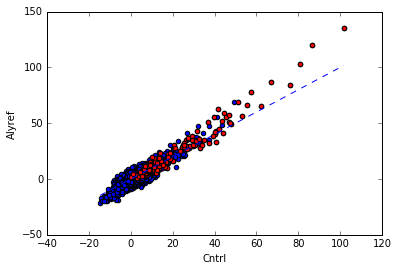

In [89]:
import matplotlib.pyplot as plt
ax = normed_kmers.plot("Cntrl", "Alyref", kind="scatter")
ax.plot((normed_kmers["Cntrl"].min(), normed_kmers["Cntrl"].max()),
         (normed_kmers["Cntrl"].min(), normed_kmers["Cntrl"].max()),
         "--")
ts = normed_kmers.index.str.count("T")
normed_kmers.loc[ts>4].plot(x="Cntrl", y="Alyref", ax=ax, kind="scatter", color="red")